In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [16]:
# Import the data set (the clean one we already profiled)
df = pd.read_csv('Sales2019')

# Display the data set with 3 top rows
df.head(3)

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Product Category,City,State,Revenue,Month,Hour,DayOfWeek,DayType
0,0,141234,iPhone,1.0,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",Phone,Boston,Massachusetts,700.00,1,21,Tuesday,Weekday
1,1,141235,Lightning Charging Cable,1.0,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",Cable,Portland,Oregon,14.95,1,14,Monday,Weekday
2,2,141236,Wired Headphones,2.0,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",Headphones,San Francisco,California,23.98,1,13,Thursday,Weekday


### For convenience and not repeating code snippets, I will create a class and 2 single functions :
<li> The class plot_chart: to store functions for plotting charts (vertical bar, horizontal bar, pie, line and boxplot chart).
<li> 2 Functions (groupby_count and groupby_sum): to store functions for calculating sum of numerical column (Revenue, Quantity Ordered, Order ID) across different categories (categorical columns).

In [33]:
# Define a class storing functions for plotting charts
# to not repeat code snippets

class plot_chart:
    # initiate a function to get a dataframe name as a arguement
    def __init__(self, dataframe):
        self.df = dataframe
        
    # Define a function to plot vertical bar chart with 3 arguments
    # x_column represents categorical column, x_column represents numerical column, title is the chart name
    def vertical_bar(self, x_column, y_column, title):
        plt.figure(figsize=(4,3))
        plt.bar(self.df[x_column], self.df[y_column])
        plt.axhline(self.df[y_column].mean(), color='g', linestyle='--', label='Average')
        plt.xlabel(x_column)
        plt.ylabel(y_column)
        plt.title(title)
        plt.xticks(rotation=60)
        formatter = ticker.StrMethodFormatter('{x:,.0f}')
        plt.gca().yaxis.set_major_formatter(formatter)
        plt.legend()
        plt.show()
    
    # Define a function to plot vertical bar chart with the 3 same arguments
    def horizontal_bar(self, x_column, y_column, title):
        plt.figure(figsize=(4,4))
        plt.barh(self.df[x_column], self.df[y_column])
        plt.axvline(self.df[y_column].mean(), color='g', linestyle='--', label='Average')
        plt.ylabel(x_column)
        plt.xlabel(y_column)
        plt.title(title)
        plt.legend()
        plt.show()
    
    # Define a function to plot vertical bar chart with the 3 same arguments
    def pie(self, x_column, y_column, title):
        plt.figure(figsize=(4, 4))
        plt.pie(self.df[y_column], labels=self.df[x_column], autopct='%1.1f%%')
        plt.title(title)
        plt.axis('equal')
        plt.show()
    
    # Define a function to plot line chart
    def line(self, x_column, y_column, title):
        plt.figure(figsize=(8, 6))
        plt.plot(self.df[x_column], self.df[y_column])
        plt.xlabel(x_column)
        plt.ylabel(y_column)
        plt.title(title)
        plt.show()
    
    # Define a function to plot boxplot chart
    def boxplot(self, x_column, y_column, title):
        plt.figure(figsize=(8, 6))
        plt.boxplot(self.df[y_column])
        plt.xticks(range(1, len(self.df[x_column]) + 1), self.df[x_column])
        plt.xlabel(x_column)
        plt.ylabel(y_column)
        plt.title(title)
        plt.show()     


# 3. Exploratory Data Analysis: Revenue acrossing different categories

In [18]:
# Define a function to calculate total revenue across different category
# It returns a dataframe with 2 columns: categorical column and revenue column

def total_sales(cat_col):
    result = df.groupby(cat_col)['Revenue'].sum().reset_index().sort_values('Revenue', ascending=False)
    return result

### a. Total Revenue in 2019: nearly 34.5M dollars

In [19]:
# Calculate the total revenue generated in 2019, then round the result to 2 decimal
revenue2019 = round(df['Revenue'].sum(),2)
print(f' The total revenue in 2019 : {revenue2019} dollars')

 The total revenue in 2019 : 34492035.97 dollars


### b. Product Category: Despite being ranked sixth out of ten in terms of order count, laptops have the highest revenue among all products.

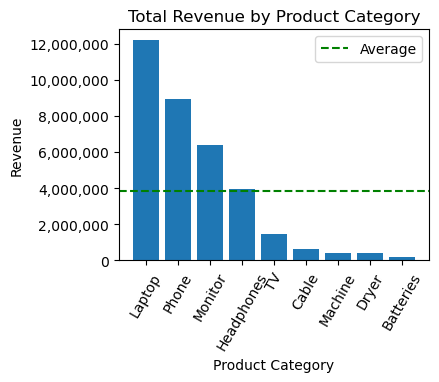

In [20]:
# Use total_sales function to calculate total revenue across product categories
sales_prodcate = total_sales('Product Category')

# Plot the bar char by using the plot_chart class and vertical_bar() function
plot_chart(sales_prodcate).vertical_bar('Product Category', 'Revenue', 'Total Revenue by Product Category')

### Although batteries and cables had the highest order count, they contributed only 2.4% to the total revenue.

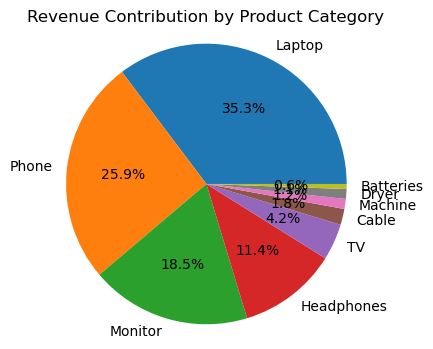

In [38]:
# Plot a chart to display revenue distribution
plot_chart(sales_prodcate).pie('Product Category', 'Revenue', 'Revenue Contribution by Product Category')

### c. Laptop and Phone from the Apple brand also generate the highest revenue.

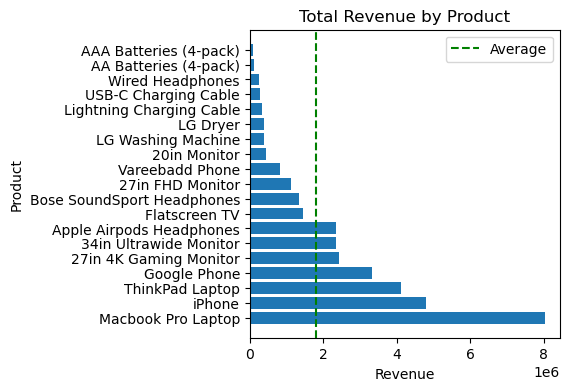

In [22]:
# Use total_sales function to calculate total revenue across product 
sales_prod = total_sales('Product')

# Plot the bar char by using the plot_chart class and vertical_bar() function
plot_chart(sales_prod).horizontal_bar('Product', 'Revenue', 'Total Revenue by Product')

### d. State: California is indeed the main market with the highest revenue, surpassing the average by more than three times. It is the only state with a revenue exceeding 13 million in the year 2019.

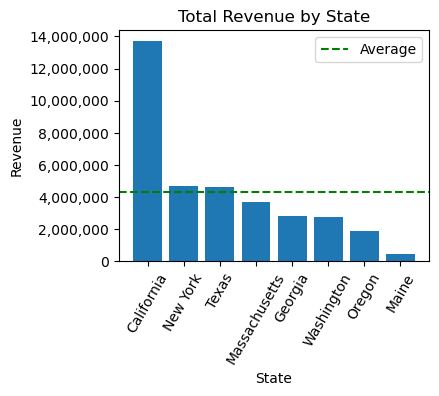

In [23]:
# Use total_sales function to calculate total revenue across States in America
sales_state = total_sales('State')

# Plot the bar char by using the plot_chart class and vertical_bar() function
plot_chart(sales_state).vertical_bar('State', 'Revenue', 'Total Revenue by State')

### California accounts for nearly 40% of the total revenue among the eight states.

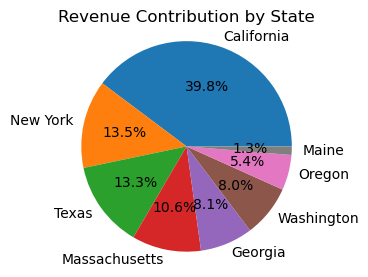

In [24]:
# Plot a pie chart to see the revenue contribution of each state
plot_chart(sales_state).pie_chart('State', 'Revenue', 'Revenue Contribution by State')

### e. City: Out of the nine cities, six have below-average revenue. Despite having two markets in Austin and Dallas, Texas has inefficient revenue generation. Further analysis and solutions are required to address this issue.

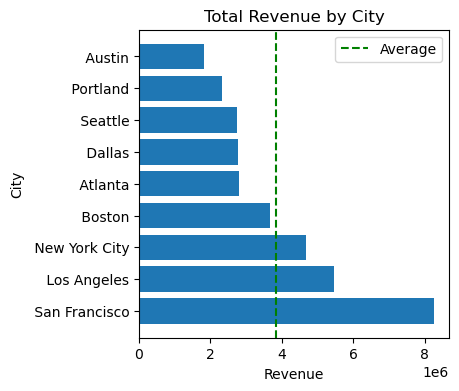

In [25]:
# Use total_sales function to calculate total revenue across cities
sales_state = total_sales('City')

# Plot the bar char by using the plot_chart class and horizontal_bar() function
plot_chart(sales_state).horizontal_bar('City', 'Revenue', 'Total Revenue by City')

### f. Month: The 4th quarter generated the highest revenue, over 4M dollars

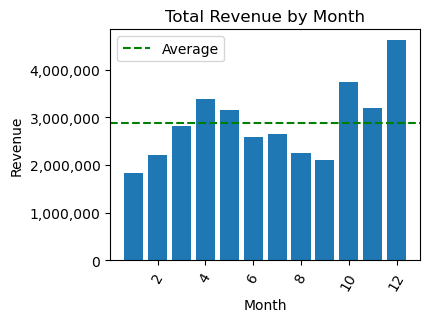

In [26]:
# Use total_sales function to calculate total revenue across 12 months
sales_monthly = total_sales('Month')

# Plot the bar char by using the plot_chart class and vertical_bar() function
plot_chart(sales_monthly).vertical_bar('Month', 'Revenue', 'Total Revenue by Month')

### g.Hour : 12PM and 7PM indeed had the highest revenue, corresponding to the highest orders

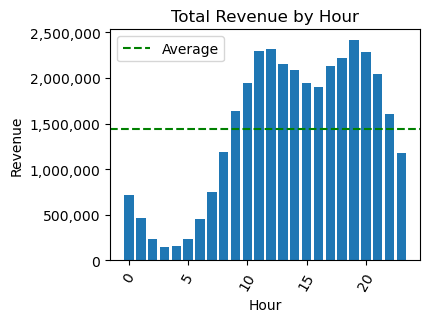

In [29]:
# Use total_sales function to calculate total revenue across hours
sales_hourly = total_sales('Hour')

# Plot the bar char by using the plot_chart class and vertical_bar() function
plot_chart(sales_hourly).vertical_bar('Hour', 'Revenue', 'Total Revenue by Hour')

### h. DAY OF WEEK: Similar to the distribution of orders, the distribution of revenue across weekdays is also relatively equal, ranging from 14.1% to 14.5%.

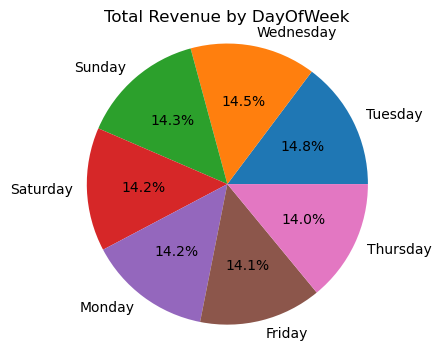

In [34]:
# Use total_sales function to calculate total revenue across weekdays
sales_DayOfWeek = total_sales('DayOfWeek')

# Plot the bar char by using the plot_chart class and vertical_bar() function
plot_chart(sales_DayOfWeek).pie('DayOfWeek', 'Revenue', 'Total Revenue by DayOfWeek')

#### *Upcoming: Price Analysis